# Signals dan Sampling

## Bentuk-bentuk sinyal di dunia nyata

Sebelum kita mulai, perlu melakukan instalasi untuk beberapa library:
```bash
pip install neurokit2 obspy scipy PyWavelets mne
```

Setelah itu kita melakukan import untuk library-library diatas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk
import pywt
from scipy import signal
from obspy.core import UTCDateTime
from obspy.clients.syngine import Client

- `neurokit2` adalah library yang berisi fungsi-fungsi untuk analisis sinyal EEG (electroencephalography)
- `mne` adalah library yang berisi fungsi-fungsi untuk analisis sinyal EEG (electroencephalography)
- `obspy` adalah library yang berisi fungsi-fungsi untuk analisis sinyal seismik
- `scipy` adalah library yang berisi fungsi-fungsi untuk analisis sinyal
- `PyWavelets` adalah library yang berisi fungsi-fungsi untuk analisis sinyal

### Sinyal Fisiologis
#### Sinyal EEG (Electroencephalography)

- Sinyal EEG adalah sinyal yang dihasilkan oleh otak manusia (encephalon)
- Sinyal EEG yang tidak diproses, tidak bisa diartikan secara kasat mata

> Warning:
> Menjalankan code ini (hanya bagian EEG) akan mengunduh sample data MNE sebesar 2.95GB. Boleh di skip jika anda tidak punya bandwidth / internet yang memadai

In [2]:
eeg_signal = nk.eeg_simulate(duration=10, sampling_rate=1000, noise=0.5, random_state=2024)

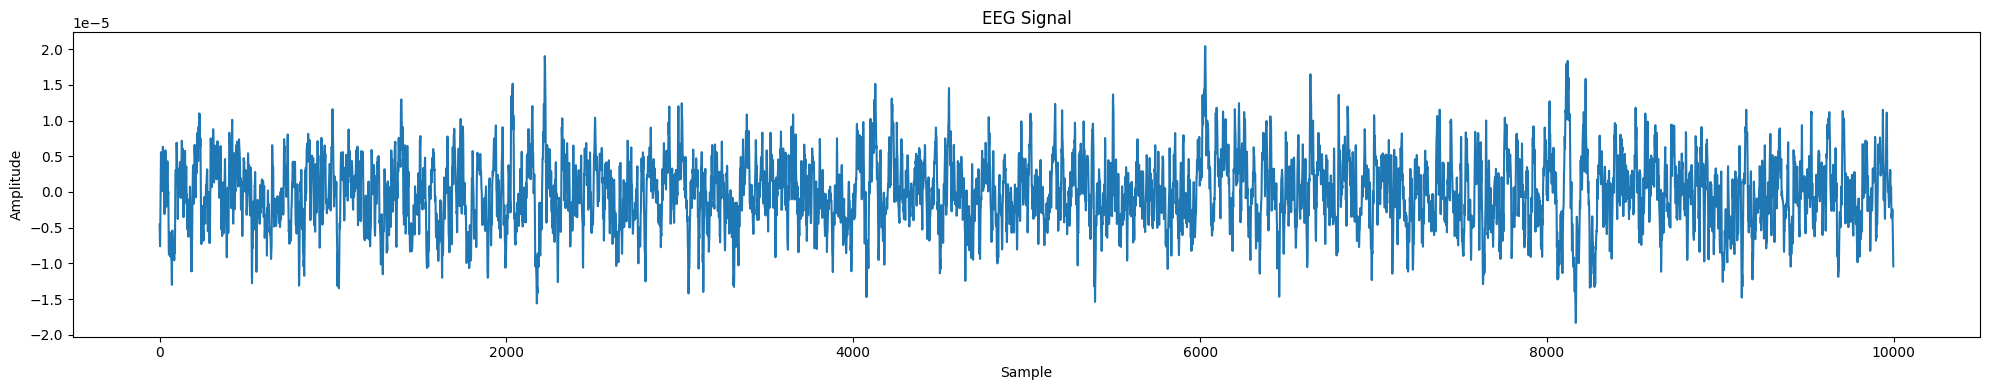

In [3]:
plt.figure(figsize=(20, 4))
plt.plot(eeg_signal)
plt.title("EEG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

#### Sinyal ECG (Electrocardiography)
- Sinayl ECG adalah sinyal yang dihasilkan oleh jantung manusia (cardio)

In [4]:
ecg_signal = nk.ecg_simulate(duration=8, sampling_rate=1000, heart_rate=65, noise=0.2, random_state=240925)

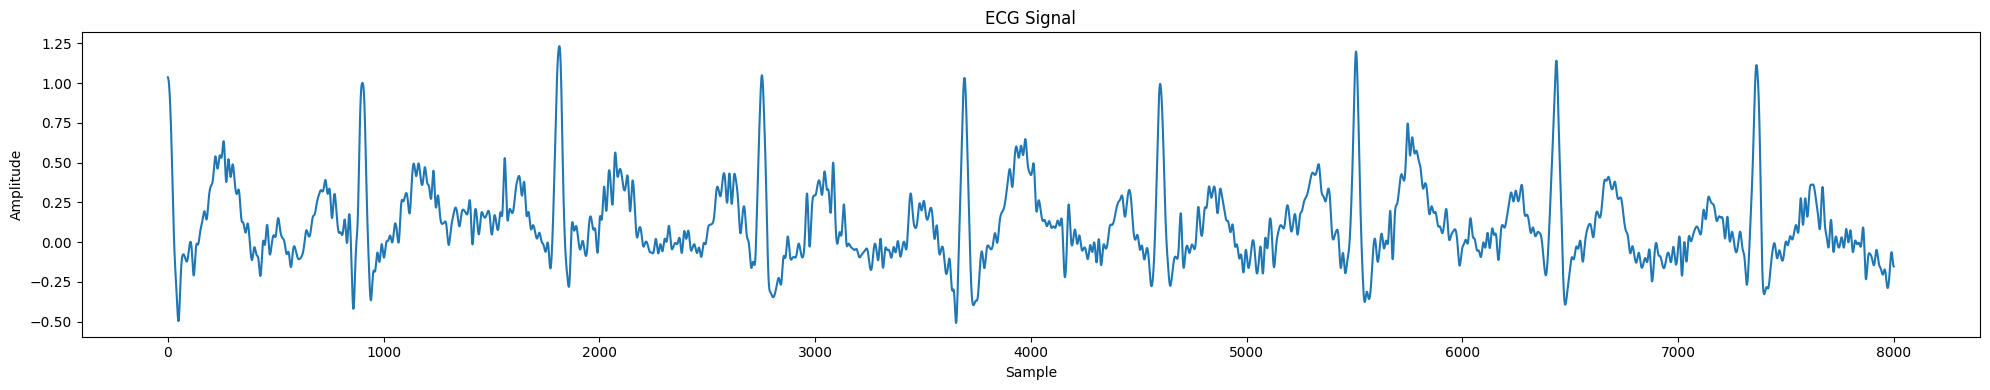

In [5]:
plt.figure(figsize=(20, 4))
plt.plot(ecg_signal)
plt.title("ECG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Mari kita analisis**
- Dalam 8000 sampel, terdapat 9 buah puncak `R` (R-peaks) dalam sinyal ECG
- Sample rate (sampling frequency) dari sinyal ECG adalah 1000 Hz
- *Berapa BPM kah detak jantung dari ECG ini?* (Dalam satu menit, berapa kali jantung berdetak)

**Cara Berpikir**:
- Sample rate adalah 1000Hz, artinya dalam satu detik terdapat 1000 sampel
- Sehingga, kalau 8000 sampel, berarti 8 detik
- Pertanyannya, kalau 8 detik ada 9 detak jantung, berarti dalam satu menit ada berapa detak jantung?


#### Sinyal Respirasi (Pernapasan)

- Sinyal Respirasi adalah sinyal yang dihasilkan oleh pernapasan manusia
- Sinyal ini direkam dengan menggunakan respiratory belt

In [6]:
resp_signal = nk.rsp_simulate(duration=60, sampling_rate=20, respiratory_rate=20, noise=0.1, random_state=2024)

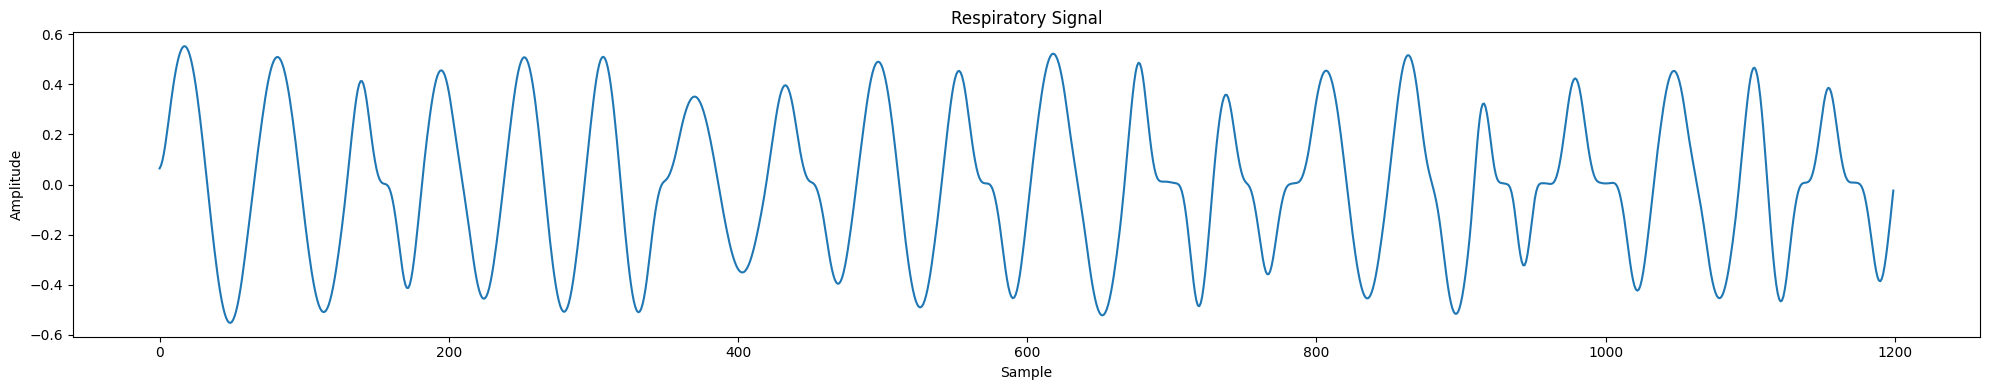

In [7]:
plt.figure(figsize=(20, 4))
plt.plot(resp_signal)
plt.title("Respiratory Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

#### Sinyal EMG (Electromyography)
- Sinyal EMG adalah sinyal yang dihasilkan oleh otot manusia

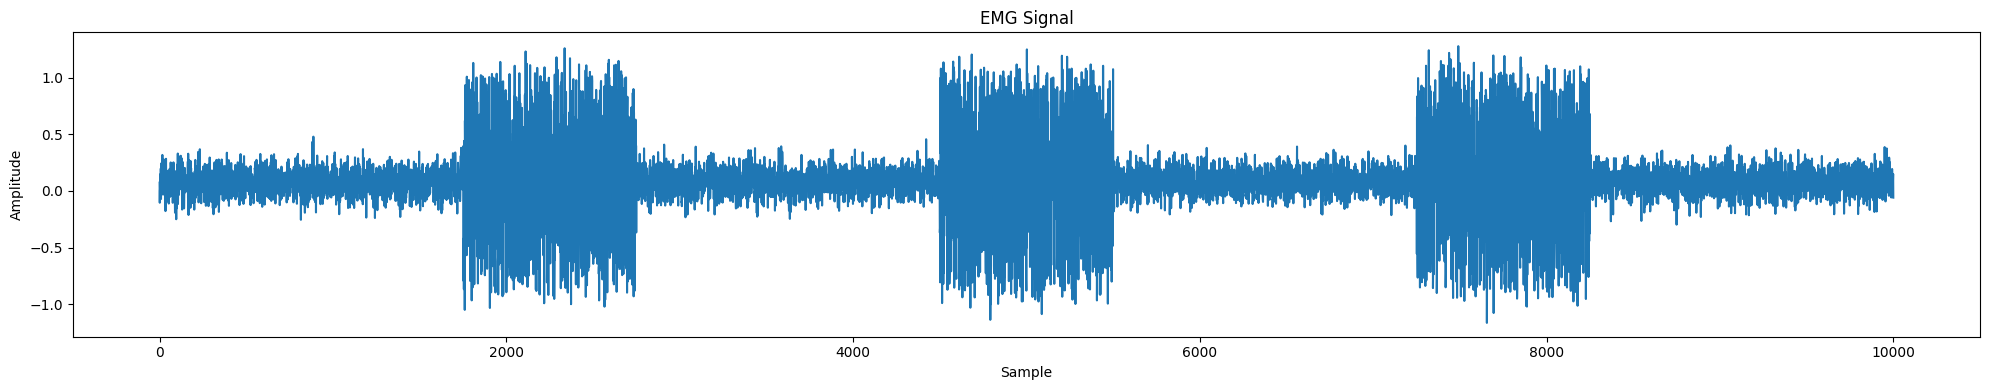

In [8]:
emg_signal = nk.emg_simulate(duration=10, sampling_rate=1000, burst_number=3, noise=0.1, random_state=2024)

plt.figure(figsize=(20, 4))
plt.plot(emg_signal)
plt.title("EMG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

### Sinyal Lingkungan

#### Sinyal Seismik (Gempa Bumi)

In [9]:
client = Client()

origin_time = UTCDateTime("2023-01-01T00:00:00.000")
seismogram = client.get_waveforms(model="ak135f_2s", sourcelatitude=-7.8007839033133575, sourcelongitude=110.37098235071159, sourcedepthinmeters=10000, receiverlatitude=35.6895, receiverlongitude=139.6917, components="ZNE", units="displacement")

<Figure size 2000x400 with 0 Axes>

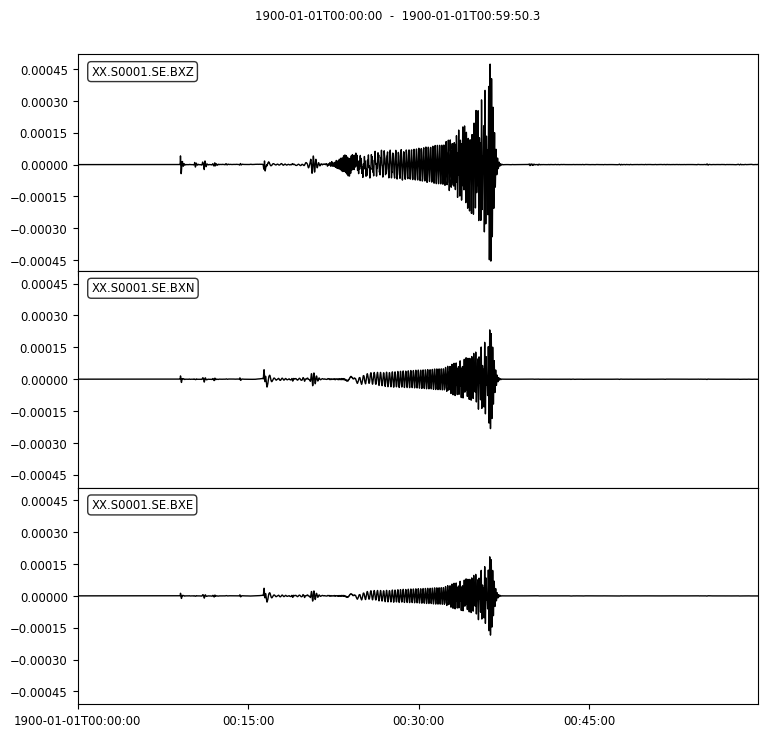

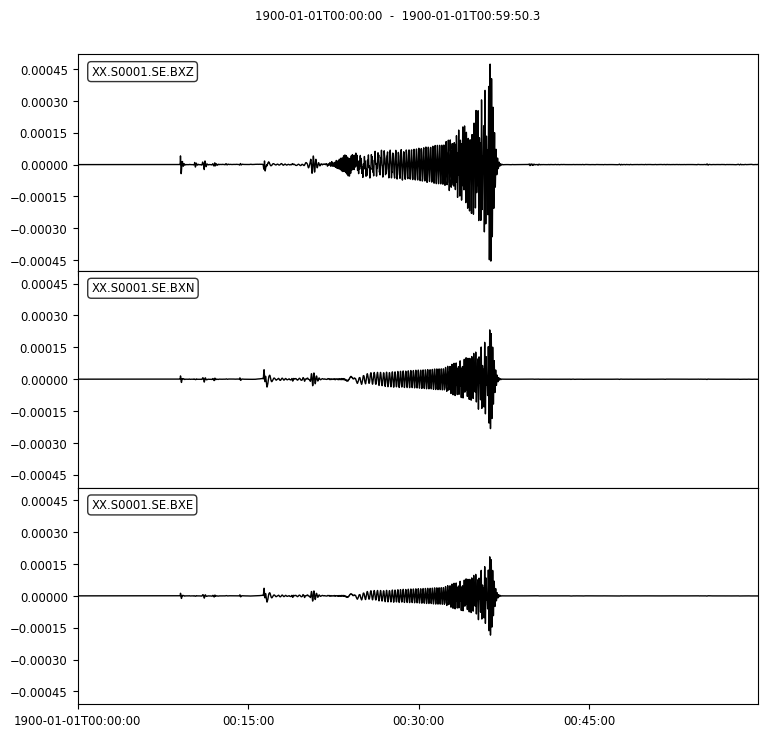

In [10]:
plt.figure(figsize=(20, 4))
seismogram.plot()

#### Sinyal Perubahan Suhu

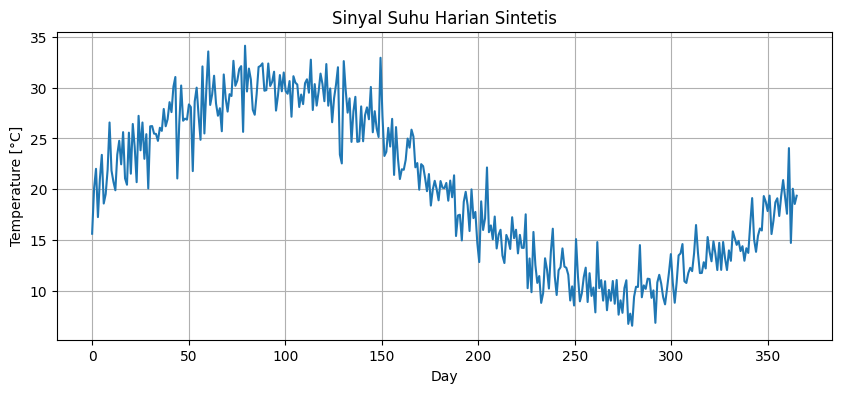

In [11]:
t = np.linspace(0, 365, 365)  # Data satu tahun

# Simulasikan variasi suhu harian dengan noise
temperature_signal = 20 + 10 * np.sin(2 * np.pi * t / 365) + 2 * np.random.normal(size=t.shape)

# Plot sinyal suhu
plt.figure(figsize=(10, 4))
plt.plot(t, temperature_signal)
plt.title('Sinyal Suhu Harian Sintetis')
plt.xlabel('Day')
plt.ylabel('Temperature [°C]')
plt.grid(True)
plt.show()

### Sinyal Komunikasi
#### Sinyal Radio AM

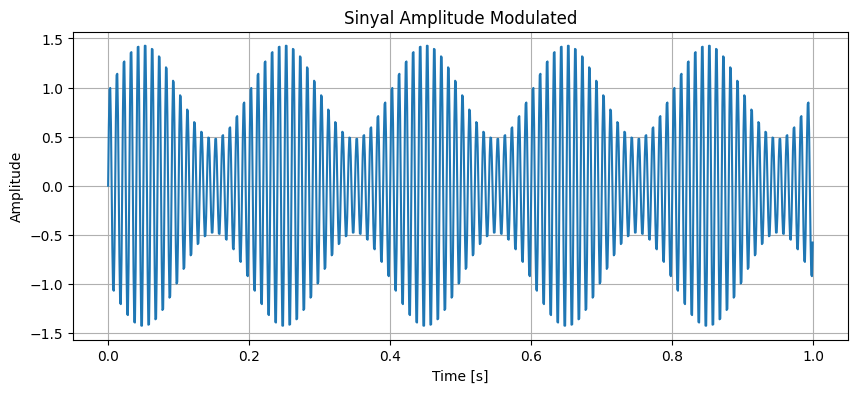

In [12]:
# Parameter
fs = 1000  # Sampling frequency
carrier_freq = 100  # Carrier frequency in Hz
modulating_freq = 5  # Modulating frequency in Hz

t = np.linspace(0, 1, fs, endpoint=False)  # Vektor waktu
carrier = np.sin(2 * np.pi * carrier_freq * t)  # Sinyal pembawa
modulating_signal = 1 + 0.5 * np.sin(2 * np.pi * modulating_freq * t)  # Sinyal modulasi

# Sinyal amplitude modulated
am_signal = carrier * modulating_signal

# Plot sinyal AM
plt.figure(figsize=(10, 4))
plt.plot(t, am_signal)
plt.title('Sinyal Amplitude Modulated')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### Sinyal Mekanik
#### Sinyal Getaran

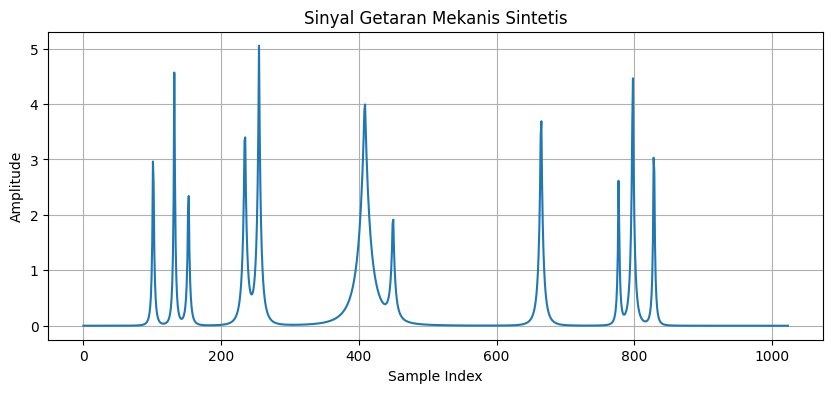

In [13]:
vibration_signal = pywt.data.demo_signal('Bumps', n=1024)

# Plot sinyal getaran
plt.figure(figsize=(10, 4))
plt.plot(vibration_signal)
plt.title('Sinyal Getaran Mekanis Sintetis')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

### **Kesimpulan**

Dalam modul hands-on ini, Anda telah mengeksplorasi berbagai jenis sinyal kehidupan nyata di berbagai bidang:

- **Sinyal Fisiologis**: ECG, EEG, pernapasan, dan EMG, yang sangat penting untuk memantau fungsi tubuh.
- **Sinyal Lingkungan**: Sinyal seismik dan suhu, yang berguna dalam mempelajari fenomena alam.
- **Sinyal Komunikasi**: Sinyal AM, yang merupakan dasar dari transmisi data.
- **Sinyal Mekanik**: Sinyal getaran, yang penting untuk pemantauan dan pemeliharaan mesin.

Simulasi ini memberikan gambaran tentang bagaimana sinyal-sinyal dunia nyata dapat dibuat dan dianalisis menggunakan Python, yang merupakan keterampilan yang berharga dalam bidang seperti teknik biomedis, ilmu lingkungan, sistem komunikasi, dan teknik mesin.

---

## Resampling & Interpolating

**Apa itu resampling?**
- Resampling adalah proses mengubah sampling frequency dari sinyal (mengubah banyaknya sampel dalam satu detik)
- Terdapar dua jenis resampling: upsampling dan downsampling

**Apa itu interpolasi?**
- Interpolasi adalah proses mengisi nilai-nilai yang hilang dalam sinyal

**Penjelasan di kelas terkait resampling menggunakan Excel**

<img src="./screenshot/ss-a.png" alt="Contoh Screenshot" width="50%"/>

**Contoh interpolasi sederhana (linear) dari 5Hz ke 10Hz**

<img src="./screenshot/ss-b.png" alt="Contoh Screenshot" width="50%"/>

In [14]:
fs = 20 # Frekuensi sampling
dur = 20 # Durasi sinyal dalam detik

resp_signal = nk.rsp_simulate(duration=dur, sampling_rate=fs, respiratory_rate=20, noise=0.01, random_state=2024)
resp_signal = resp_signal * 10 # Amplifikasi sinyal

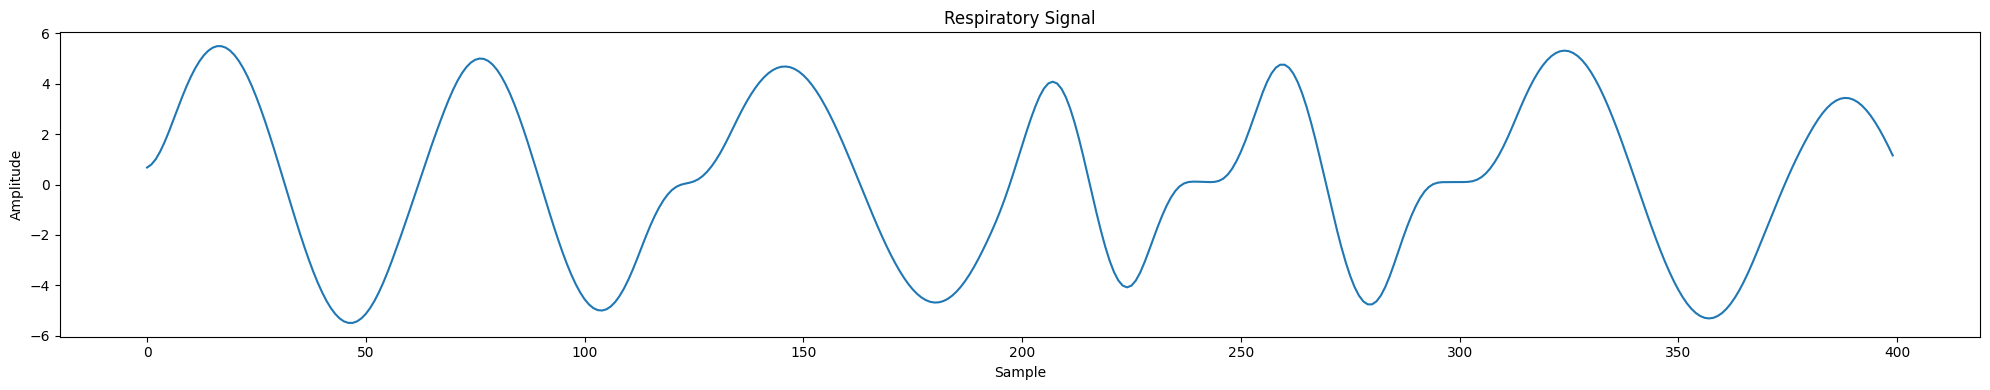

In [15]:
plt.figure(figsize=(20, 4))
plt.plot(resp_signal)
plt.title("Respiratory Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Kasus Resample**:
- Kita punya sinyal asli dengan frekuensi sampling 20 Hz (Artinya ada 20 nilai dalam satu detik)
- Total elemen (total sampel) dari sinyal ini adalah 400 sampel
- Kita akan melakukan resample menjadi 10 Hz (Artinya ada 10 nilai dalam satu detik)
- Sehingga, berapa total elemen (total sampel) dari sinyal hasil resample?
    - Fs * Durasi dalam detik = 10 * 20 = 200 sampel

In [16]:
resp_signal_res10 = []

for i in range(0, len(resp_signal), 2):
    resp_signal_res10.append(resp_signal[i])

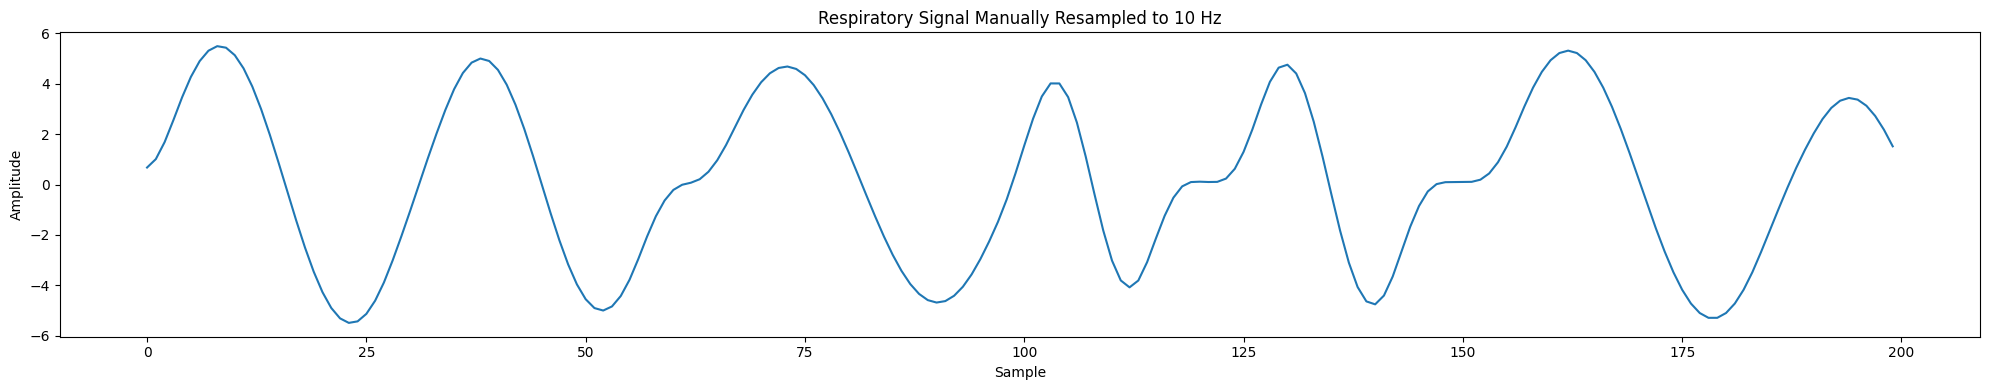

In [17]:
plt.figure(figsize=(20, 4))
plt.plot(resp_signal_res10)
plt.title("Respiratory Signal Manually Resampled to 10 Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Cara Kerja Resampling diatas (Secara Manual**)
- Kita akan mengambil setiap 2 elemen dari sinyal asli (karena kita akan downsampling dari 20 Hz menjadi 10 Hz). 20 dibagi 10 = 3
- Kita akan mengambil elemen ke-0, elemen ke-2, elemen ke-4, elemen ke-6, dst
- Hasilnya, kita memiliki sinyal dengan elemen yang berkurang menjadi 200 sampel

**Bagaimana membuatnya dengan cara yang lebih praktis di Python?**

In [18]:
# Interpolate menggunakan Numpy

time_axis = np.linspace(0, len(resp_signal), 200)
signal_resampled_interp = np.interp(time_axis, np.arange(len(resp_signal)), resp_signal)

Langkah-langkah interpolasi/resampled:
- Buat time axis untuk sinyal yang baru dengan rumus
```python
time_axis = np.linspace(0, panjang_sinyal_asli, panjang sinyal baru)
sinyal_hasil_resample = np.interp(time_axis, np.arange(panjang_sinyal_asli), sinyal_asli)
```

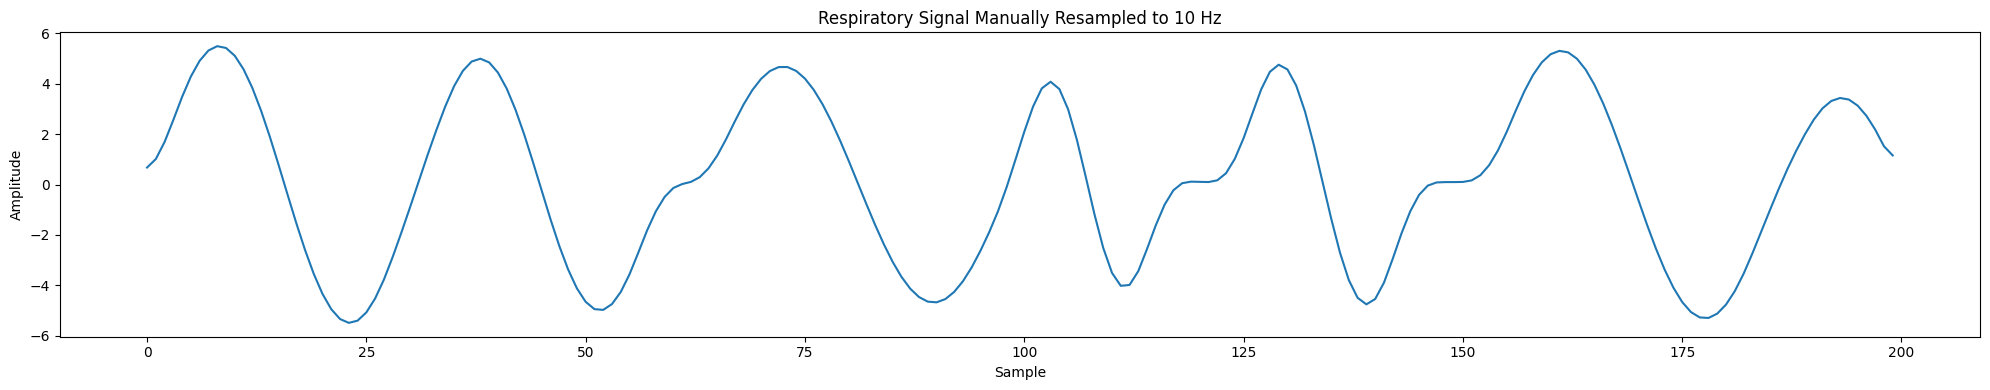

In [19]:
plt.figure(figsize=(20, 4))
plt.plot(signal_resampled_interp)
plt.title("Respiratory Signal Manually Resampled to 10 Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Bagaimana kalau di Upsampling** dari variable `resp_signal` ke `resp_signal_upsampled`?

In [20]:
time_axis = np.linspace(0, len(resp_signal), 800)
signal_upsampled_interp = np.interp(time_axis, np.arange(len(resp_signal)), resp_signal)

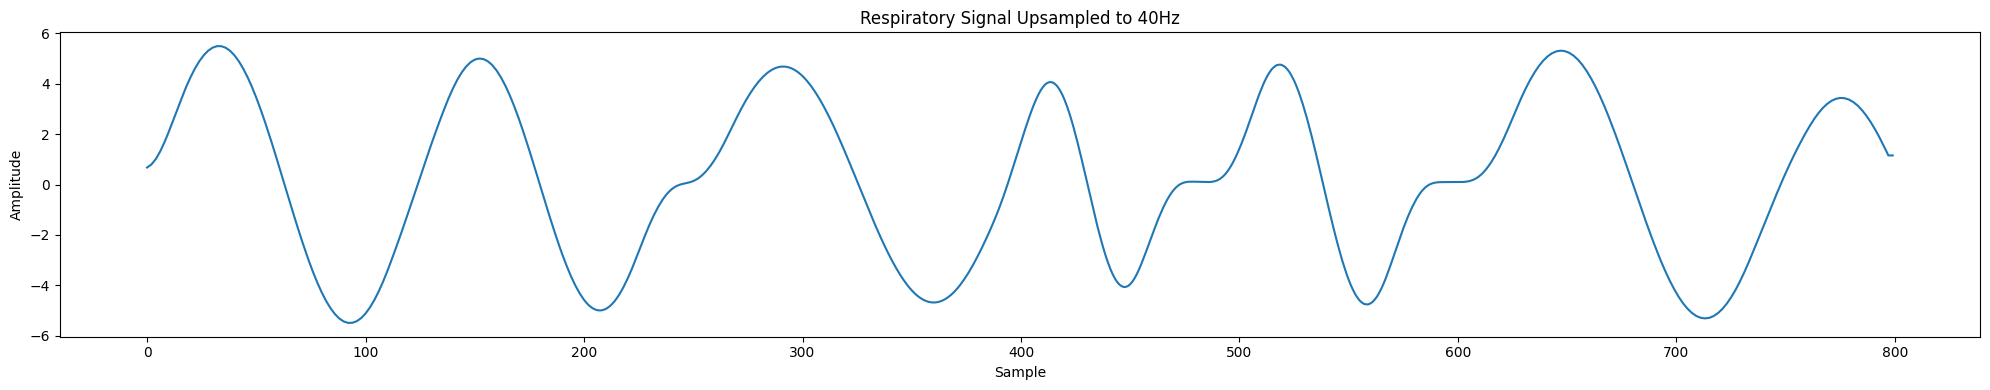

In [21]:
plt.figure(figsize=(20, 4))
plt.plot(signal_upsampled_interp)
plt.title("Respiratory Signal Upsampled to 40Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

**Downsample Ekstrim**

Dari 20Hz ke 4Hz

In [22]:
fs_target = 4 # Frekuensi sampling target (Hz)
durasi_asli = 20 # dalam detik
panjang_elemen_setelah_resampling = fs_target * durasi_asli

time_axis = np.linspace(0, len(resp_signal), panjang_elemen_setelah_resampling)
resample_extreme = np.interp(time_axis, np.arange(len(resp_signal)), resp_signal)

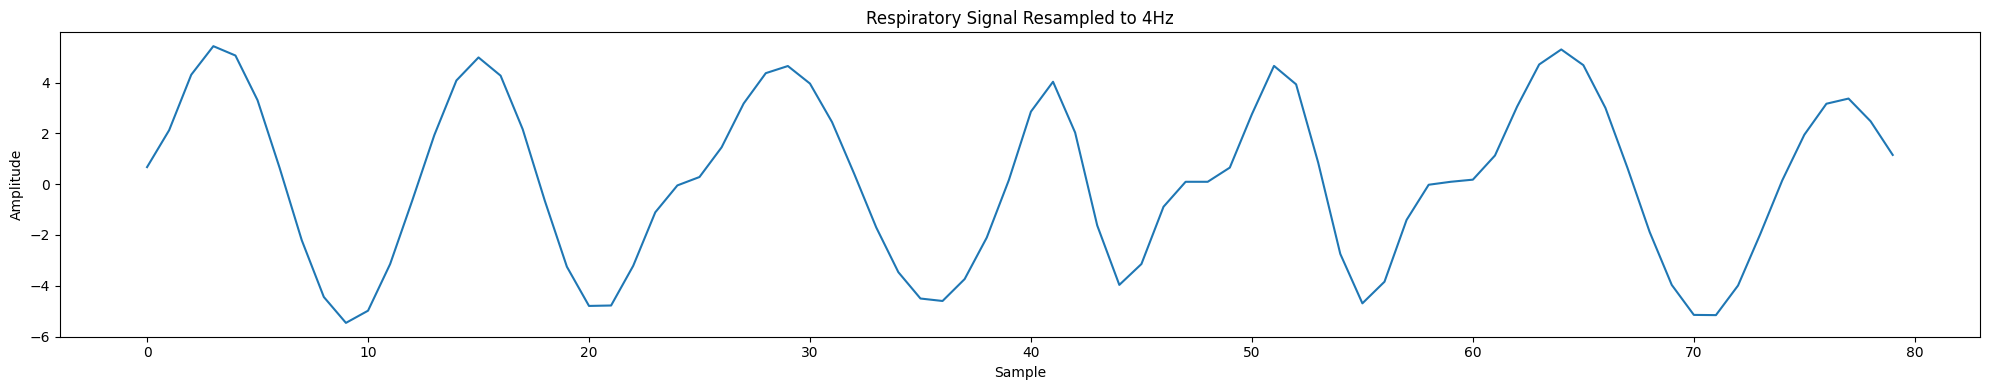

In [23]:
plt.figure(figsize=(20, 4))
plt.plot(resample_extreme)
plt.title("Respiratory Signal Resampled to 4Hz")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

## Filtering

**Apa itu filtering?**
- Filtering adalah proses menghilangkan komponen frekuensi tertentu dari sinyal
- Filtering bisa digunakan untuk menghilangkan noise dari sinyal

Misalnya, kita punya dua buah sinyal yang digabungkan

In [24]:
fs = 1000
time_axis = np.linspace(0, 1, fs)

signal_1 = np.sin(2 * np.pi * 10 * time_axis)
signal_2 = np.sin(2 * np.pi * 35 * time_axis)
signal_combine = signal_1 + signal_2

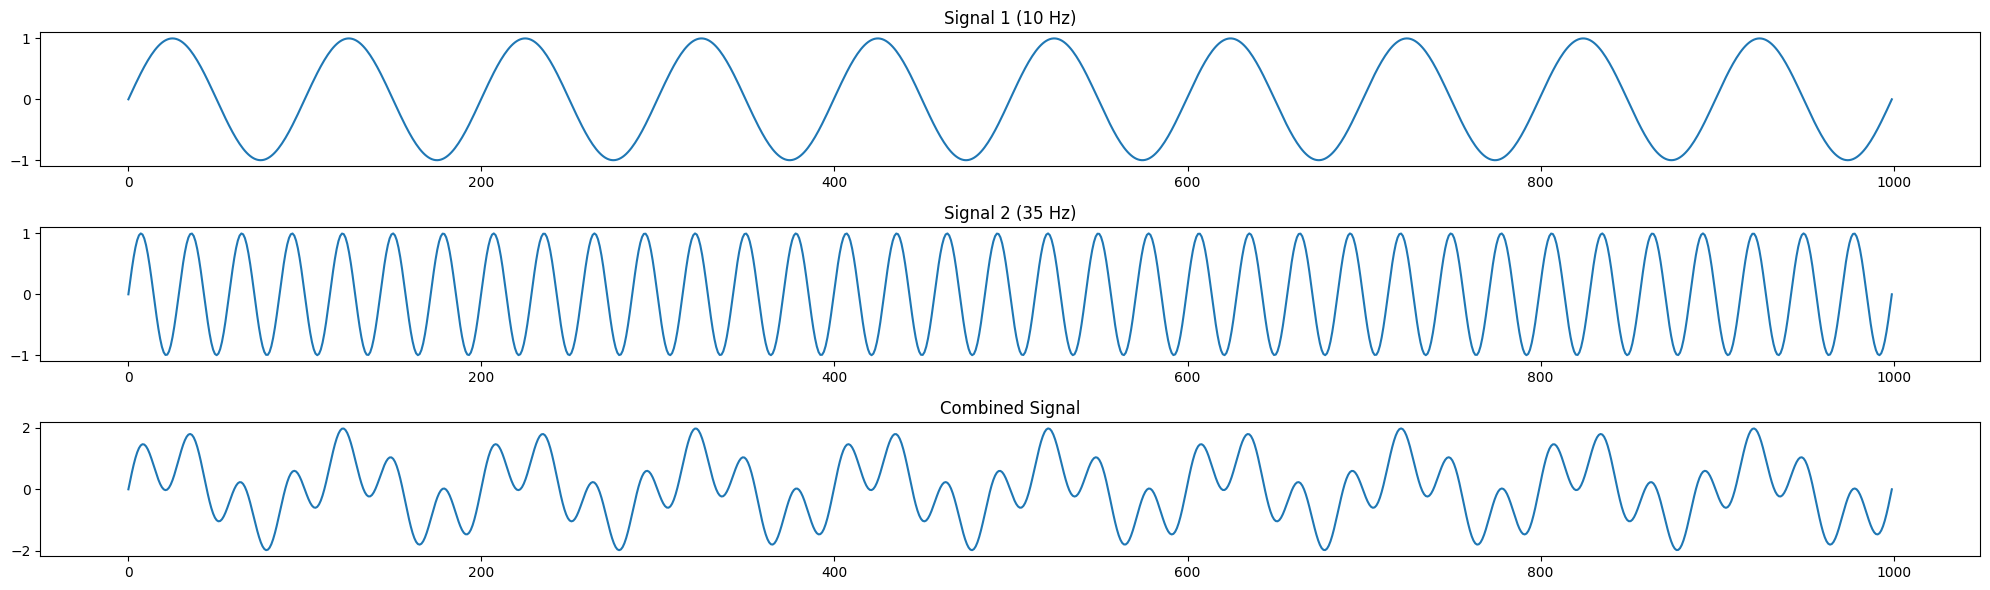

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(20, 6))
ax[0].plot(signal_1)
ax[0].set_title("Signal 1 (10 Hz)")
ax[1].plot(signal_2)
ax[1].set_title("Signal 2 (35 Hz)")
ax[2].plot(signal_combine)
ax[2].set_title("Combined Signal")
plt.tight_layout()
plt.show()

Misalnya, sinyal 1 adalah sinyal yang informasinya kita butuhkan, sedangkan sinyal 2 adalah noise. Bagaimana cara memisahkan sinyal 1 dari sinyal 2?

Disinilah kita butuh filter

### Mendesain Filter

In [26]:
cutoff = 15 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

# atau cara lain menuliskannya
# cutoff_nyquist = cutoff / (fs / 2)
# b, a = signal.butter(order, cutoff_nyquist, btype='low')

### Menerapkan Filter
Mari kita lakukan filtering

In [27]:
filtered_signal = signal.filtfilt(b, a, signal_combine)

### Melihat hasil filtering

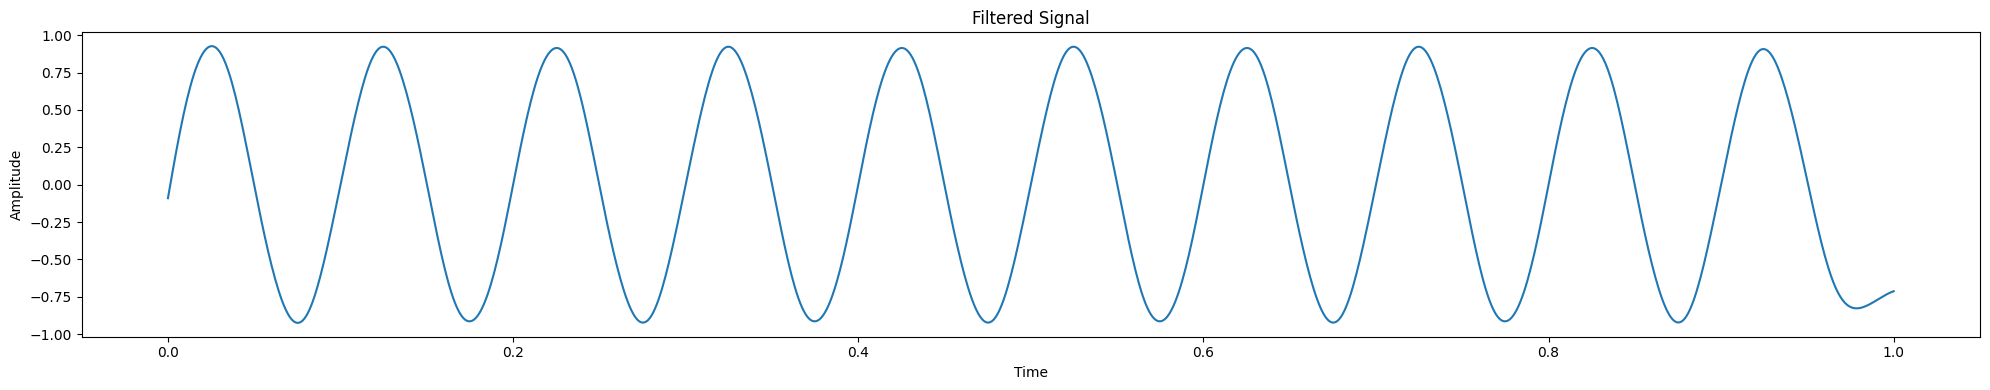

In [28]:
plt.figure(figsize=(20, 4))
plt.plot(time_axis, filtered_signal)
plt.title("Filtered Signal")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

## Bagaimana kalau kita ingin membuang yang frekuensi rendah?

Berarti kita membutuhkan high pass filter

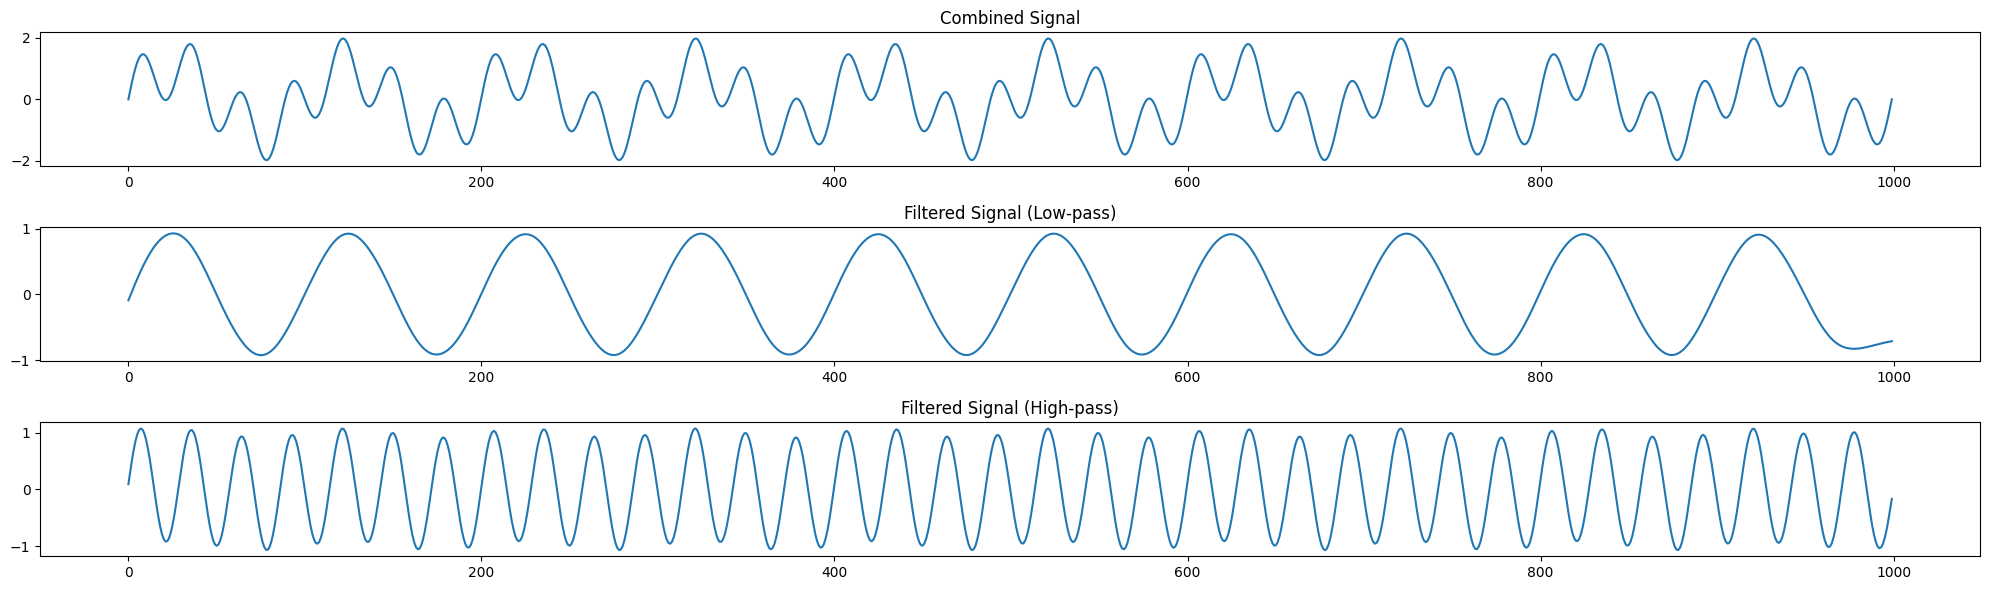

In [29]:
cutoff = 15 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, cutoff, fs=fs, btype='high', analog=False)
signal_filt_hp = signal.filtfilt(b, a, signal_combine)

fig, ax = plt.subplots(3, 1, figsize=(20, 6))
ax[0].plot(signal_combine)
ax[0].set_title("Combined Signal")
ax[1].plot(filtered_signal)
ax[1].set_title("Filtered Signal (Low-pass)")
ax[2].plot(signal_filt_hp)
ax[2].set_title("Filtered Signal (High-pass)")
plt.tight_layout()
plt.show()

### Bagaimana kalau ada dua buah sinyal yang kita ingin buang?

Dimana, informasi yang kita butuhkan, dihimpit oleh dua buah sinyal yang tidak kita butuhkan.

Pertama-tama, mari kita buat sinyal-sinyalnya

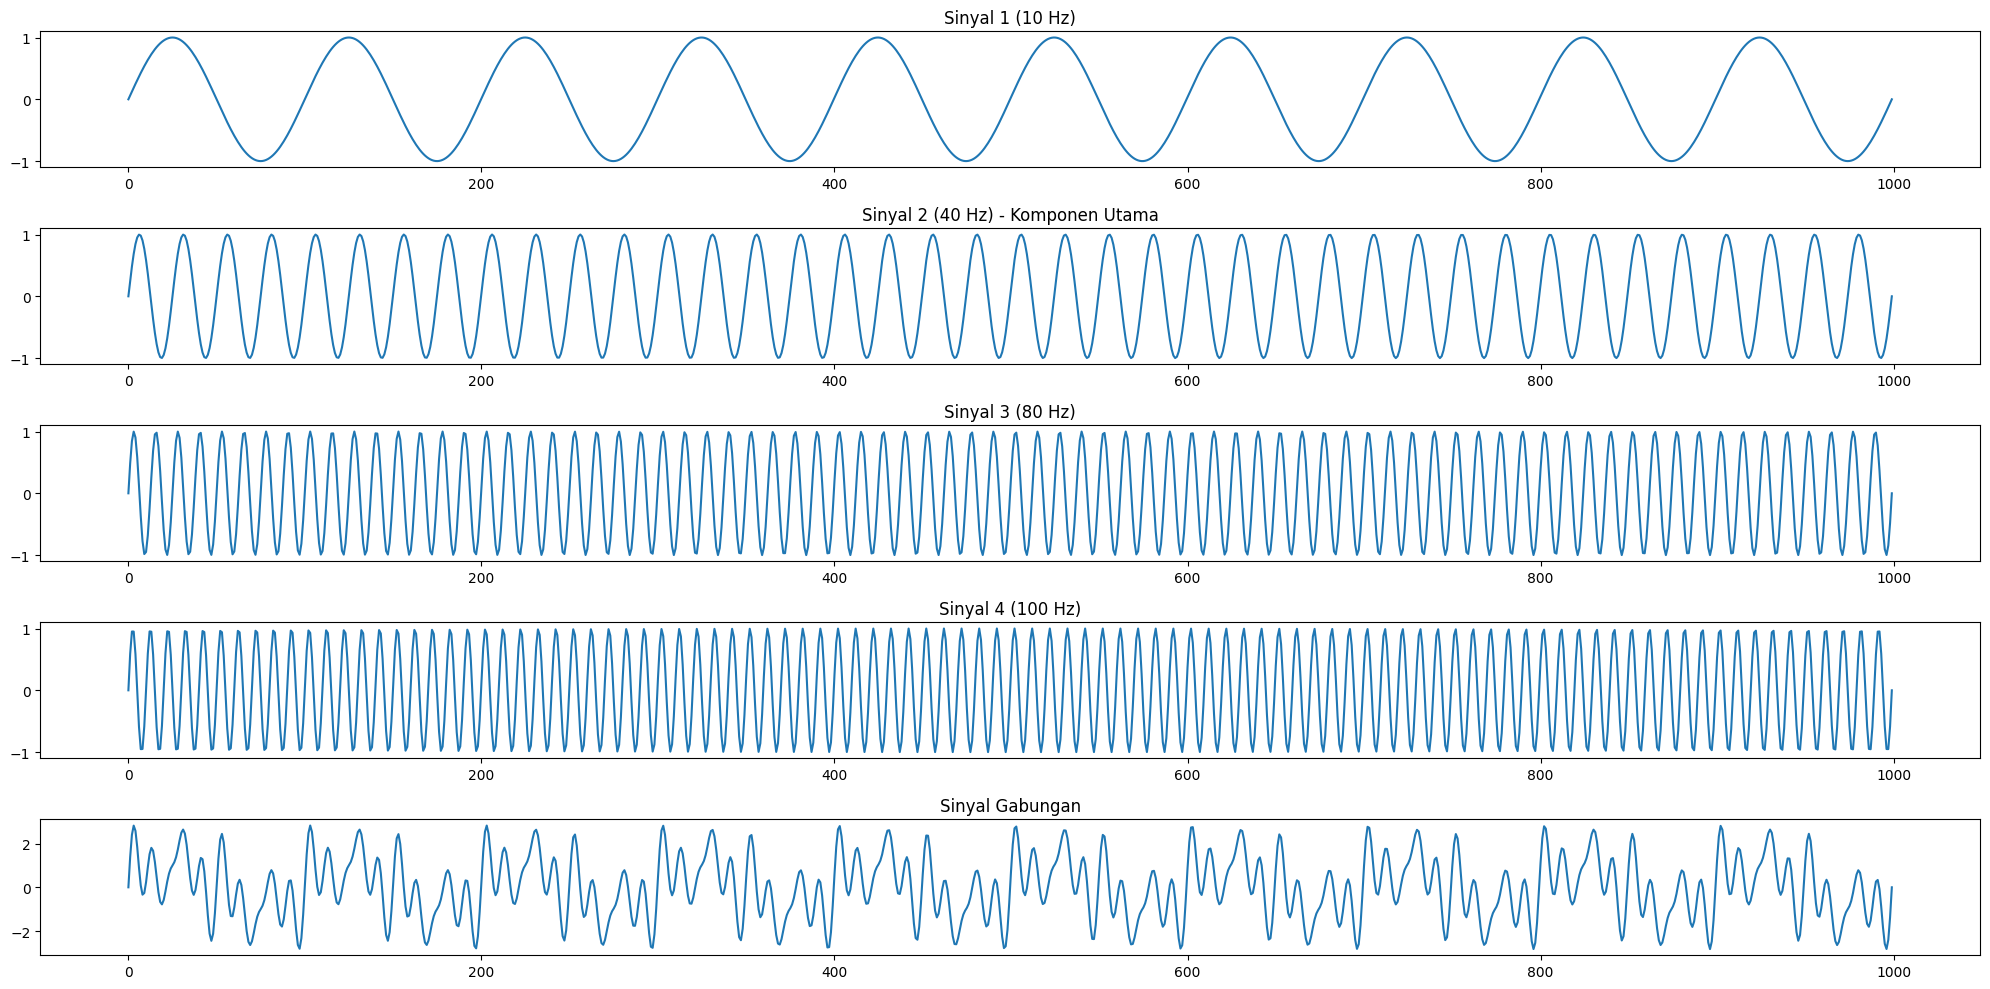

In [30]:
fs = 1000
time_axis = np.linspace(0, 1, fs)

sinyal_1 = np.sin(2 * np.pi * 10 * time_axis) # 10 Hz
sinyal_2 = np.sin(2 * np.pi * 40 * time_axis) # 40 Hz
sinyal_3 = np.sin(2 * np.pi * 80 * time_axis) # 80 Hz
sinyal_4 = np.sin(2 * np.pi * 100 * time_axis) # 100 Hz
sinyal_gabungan = sinyal_1 + sinyal_2 + sinyal_3 + sinyal_4

fig, ax = plt.subplots(5, 1, figsize=(20, 10))
ax[0].plot(sinyal_1)
ax[0].set_title("Sinyal 1 (10 Hz)")
ax[1].plot(sinyal_2)
ax[1].set_title("Sinyal 2 (40 Hz) - Komponen Utama")
ax[2].plot(sinyal_3)
ax[2].set_title("Sinyal 3 (80 Hz)")
ax[3].plot(sinyal_4)
ax[3].set_title("Sinyal 4 (100 Hz)")
ax[4].plot(sinyal_gabungan)
ax[4].set_title("Sinyal Gabungan")
plt.tight_layout()
plt.show()

### Melakukan Bandpass (Menghilangkan frekuensi rendah dan tinggi)

Maka kita akan lakukan bandpass di cutoff 27 dan 50 Hz untuk mengambil sinyal yang kita butuhkan (40 Hz)

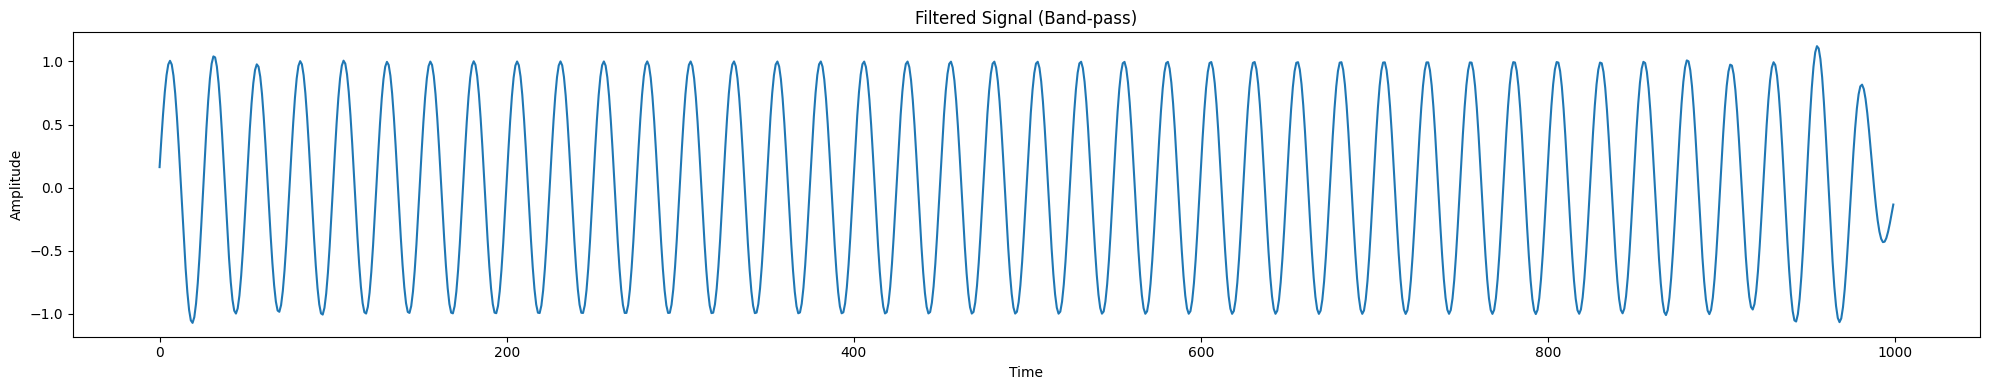

In [31]:
cutoff_low = 27 # Frekuensi cutoff dalam Hz
cutoff_high = 50 # Frekuensi cutoff dalam Hz
order = 3 # Orde filter

b, a = signal.butter(order, [cutoff_low, cutoff_high], fs=fs, btype='band', analog=False)
signal_filt_band = signal.filtfilt(b, a, sinyal_gabungan)

plt.figure(figsize=(20, 4))
plt.plot(signal_filt_band)
plt.title("Filtered Signal (Band-pass)")
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

### Bagaimana kalau yang difilter adalah sinyal non-stasioner (sinyal yang frekuensinya berubah-ubah)?

Mari kita pakai contoh sinyal ECG

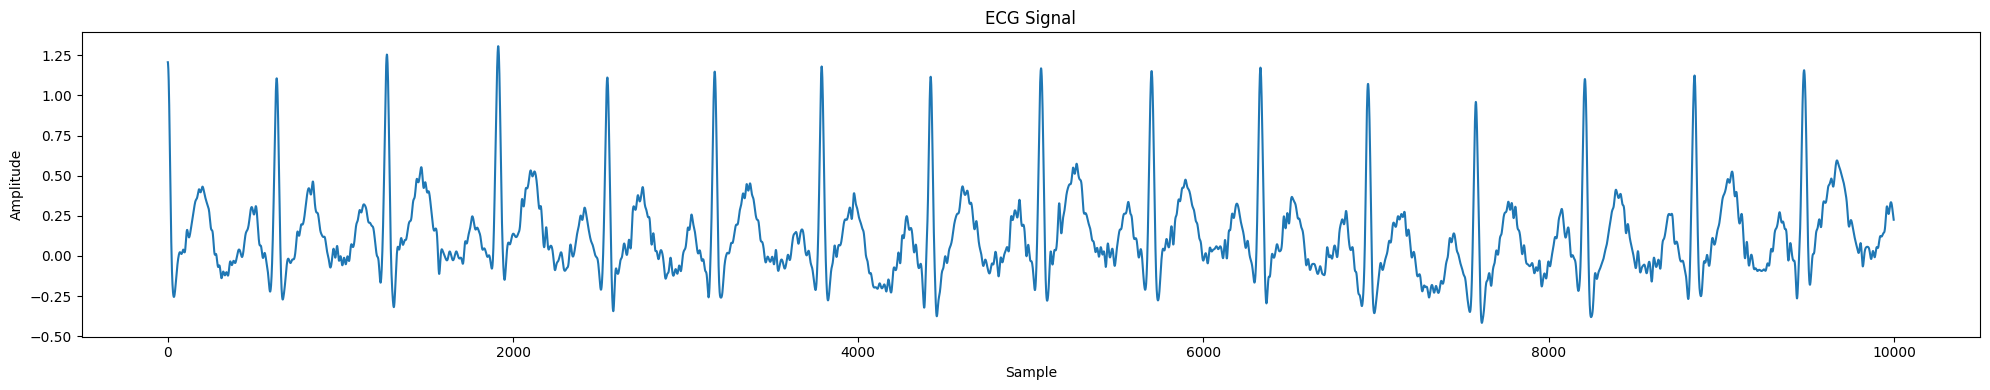

In [32]:
fs = 1000
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=fs, heart_rate=95, noise=0.1, random_state=2102045)
plt.figure(figsize=(20, 4))
plt.plot(ecg_signal)
plt.title("ECG Signal")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

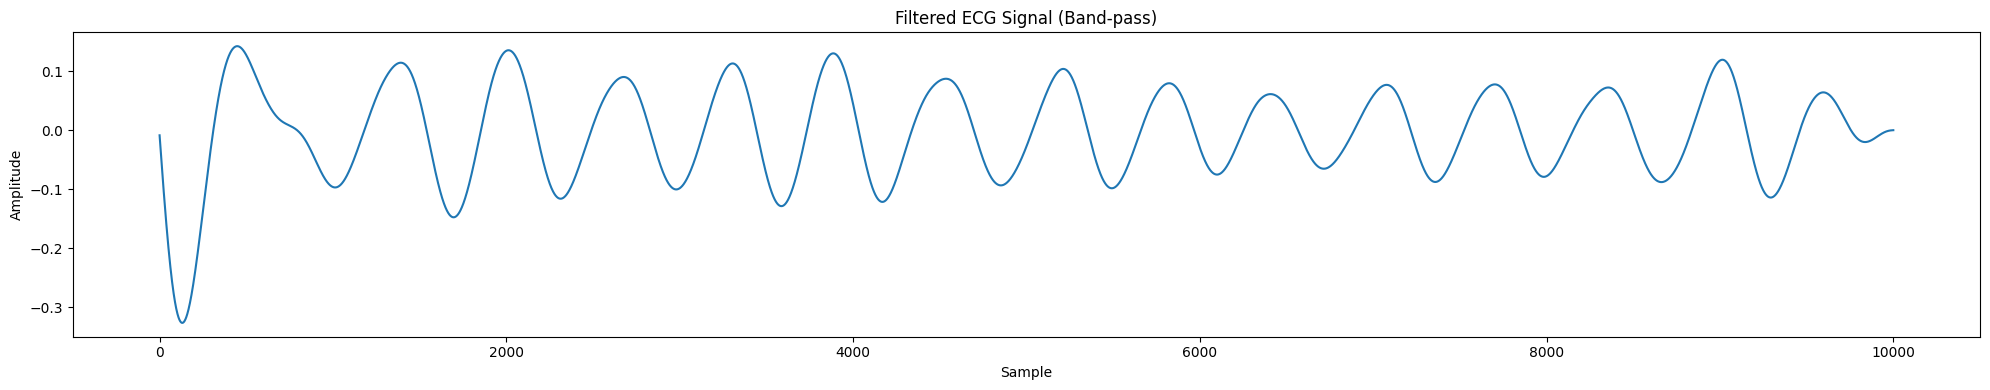

In [33]:
b, a = signal.butter(2, [1.2, 2.3], fs=fs, btype='band', analog=False)
ecg_filt_band = signal.filtfilt(b, a, ecg_signal)

plt.figure(figsize=(20, 4))
plt.plot(ecg_filt_band)
plt.title("Filtered ECG Signal (Band-pass)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.tight_layout()
plt.show()

---
## Tugas: `ho1`

#### Instruksi:

5. Buktikanlah bahwa proses downsampling (resampling dengan laju sampling yang lebih rendah) dapat menghilangkan informasi dari sinyal asli. Untuk melakukan hal ini, gunakan sinyal ECG sintetis (dengan method `nk.ecg_simulate`) sesuai spesifikasi berikut:
    - Durasi: `Berdasarkan 3 digit terakhir nim anda`
    - Sampling Rate: `150 Hz`
    - Noise Level: `0.<2 digit nim terakhir>`
    - Heart Rate: `80` BPM
    - Random State: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`

    Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat `Aliasing` pada sinyal hasil downsampling. Jelaskan apa itu `Aliasing`

6. Terdapat parameter `order` pada saat melakukan filtering. Apa yang dimaksud dengan `order`? Apa yang terjadi ketika mengubah nilai `order`? Lakukan experimen secara mandiri

7. Lakukan eksperimen dengan merancang filter band-pass menggunakan `signal.butter`. Pada sinyal respirasi (pernapasan). Anda dapat dengan bebas menentukan sinyal asli, noise, dan frekuensi cutoff yang diinginkan. Jelaskan latar belakang penentuan frekuensi cutoff


### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan